#  Capstone Project - The Battle of Neighborhoods in Tokyo

# Part-1

In [1]:
import numpy as np 
import pandas as pd 

!conda install -c conda-forge lxml --yes 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libblas-3.8.0              |      11_openblas          10 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forge
    libc

#### 1- Use pandas to transform the data in the table on the Wikipedia page into a dataframe.

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards')[3]

In [3]:
df

,No.,Flag,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"
5,06,NaN,Taitō,台東区,200486,19830,10.11,"Ueno, Asakusa"
6,07,NaN,Sumida,墨田区,260358,18910,13.77,"Kinshichō, Morishita, Ryōgoku"
7,08,NaN,Kōtō,江東区,502579,12510,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
8,09,NaN,Shinagawa,品川区,392492,17180,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
9,10,NaN,Meguro,目黒区,280283,19110,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


#### 2- Only process the cells that have an assigned borough, we can ignore cells with 'Not assigned' boroughs, like in rows 1 & 2.

In [4]:
df.drop("Flag", axis=1, inplace=True)

In [5]:
df.drop("Major districts", axis=1, inplace=True)

In [6]:
df.rename(columns={df.columns[3]:"Population"}, inplace=True)

In [7]:
df = df.rename(columns={"Density(/km2)": "Density"})

In [8]:
df = df.rename(columns={"Area(km2)": "Area"})

In [9]:
df.head(24)

,No.,Name,Kanji,Population,Density,Area
0,01,Chiyoda,千代田区,59441,5100,11.66
1,02,Chūō,中央区,147620,14460,10.21
2,03,Minato,港区,248071,12180,20.37
3,04,Shinjuku,新宿区,339211,18620,18.22
4,05,Bunkyō,文京区,223389,19790,11.29
5,06,Taitō,台東区,200486,19830,10.11
6,07,Sumida,墨田区,260358,18910,13.77
7,08,Kōtō,江東区,502579,12510,40.16
8,09,Shinagawa,品川区,392492,17180,22.84
9,10,Meguro,目黒区,280283,19110,14.67


In [10]:
df.drop([23], inplace=True)

In [11]:
df

,No.,Name,Kanji,Population,Density,Area
0,01,Chiyoda,千代田区,59441,5100,11.66
1,02,Chūō,中央区,147620,14460,10.21
2,03,Minato,港区,248071,12180,20.37
3,04,Shinjuku,新宿区,339211,18620,18.22
4,05,Bunkyō,文京区,223389,19790,11.29
5,06,Taitō,台東区,200486,19830,10.11
6,07,Sumida,墨田区,260358,18910,13.77
7,08,Kōtō,江東区,502579,12510,40.16
8,09,Shinagawa,品川区,392492,17180,22.84
9,10,Meguro,目黒区,280283,19110,14.67


#### 6- Use the .shape method to print the number of rows of your dataframe.

In [12]:
df.shape

(23, 6)

# Part 2: Add Geospatial Data

In [13]:
!conda install -c conda-forge geopy --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.50   | 3

In [14]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Tokyo_explorer")

df['Major_Dist_Coord']= df['Kanji'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,No.,Name,Kanji,Population,Density,Area,Latitude,Longitude
0,01,Chiyoda,千代田区,59441,5100,11.66,35.693810,139.753216
1,02,Chūō,中央区,147620,14460,10.21,35.666255,139.775565
2,03,Minato,港区,248071,12180,20.37,35.643227,139.740055
3,04,Shinjuku,新宿区,339211,18620,18.22,35.693763,139.703632
4,05,Bunkyō,文京区,223389,19790,11.29,35.718810,139.744732
5,06,Taitō,台東区,200486,19830,10.11,35.717450,139.790859
6,07,Sumida,墨田区,260358,18910,13.77,35.700429,139.805017
7,08,Kōtō,江東区,502579,12510,40.16,35.649154,139.812790
8,09,Shinagawa,品川区,392492,17180,22.84,35.599252,139.738910
9,10,Meguro,目黒区,280283,19110,14.67,35.621250,139.688014


# Part-3 Clustering Neighborhoods in Tokyo

In [15]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


#### Let's get the geographical coordinates of Tokyo

In [16]:
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tokyo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tokyo are 35.6828387, 139.7594549.


#### Let's visualize the neighborhoods in Tokyo

In [35]:
# create map of Tokyo using latitude and longitude values
map_tokyo = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tokyo) 
    
map_tokyo

#### Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

##### Define Foursquare Credentials and Version

In [18]:
# @hidden_cell
CLIENT_ID = 'MQ0XIFC4T5X5MCUWN1M3VZ011RFZQPP5JZ1AO02PIIWJZPN0' # your Foursquare ID
CLIENT_SECRET = 'DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MQ0XIFC4T5X5MCUWN1M3VZ011RFZQPP5JZ1AO02PIIWJZPN0
CLIENT_SECRET:DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5


In [19]:
df.loc[0, 'Name']

'Chiyoda'

#### Now, let's get the top 100 venues that are in Chiyoda within a radius of 500 meters

In [20]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Chiyoda are 35.6938097, 139.7532163.


In [21]:
LIMIT = 100

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=MQ0XIFC4T5X5MCUWN1M3VZ011RFZQPP5JZ1AO02PIIWJZPN0&client_secret=DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5&v=20180604&ll=35.6938097,139.7532163&radius=500&limit=100'

In [36]:
results = requests.get(url).json()

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Jimbocho Kurosu (神保町 黒須),Ramen Restaurant,35.695539,139.754851
1,Kitanomaru Park (北の丸公園),Park,35.691653,139.751201
2,Nippon Budokan (日本武道館),Stadium,35.693356,139.749865
3,Shimizumon Gate (清水門),Historic Site,35.692685,139.752681
4,Kanda Tendonya (神田天丼家),Tempura Restaurant,35.695765,139.754682


In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

90 venues were returned by Foursquare.


In [43]:
print ('{} unique categories in Chiyoda'.format(nearby_venues['categories'].value_counts().shape[0]))

45 unique categories in Chiyoda


In [46]:
print (nearby_venues['categories'].value_counts()[0:10])

Chinese Restaurant           8
Coffee Shop                  7
Ramen Restaurant             7
Convenience Store            6
Café                         5
Sake Bar                     3
Japanese Curry Restaurant    3
Japanese Restaurant          3
Historic Site                3
Soba Restaurant              2
Name: categories, dtype: int64


#### Explore Neighborhoods in Tokyo

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [27]:
Tokyo_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Chiyoda
Chūō
Minato
Shinjuku
Bunkyō
Taitō
Sumida
Kōtō
Shinagawa
Meguro
Ōta
Setagaya
Shibuya
Nakano
Suginami
Toshima
Kita
Arakawa
Itabashi
Nerima
Adachi
Katsushika
Edogawa


In [28]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Tokyo_Venues_only_restaurant = Tokyo_venues[Tokyo_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Tokyo_Venues_only_restaurant.index = np.arange(1, len(Tokyo_Venues_only_restaurant )+1)

In [29]:
print (Tokyo_Venues_only_restaurant['Venue Category'].value_counts())

Ramen Restaurant             56
Japanese Restaurant          55
Chinese Restaurant           37
Sushi Restaurant             35
Soba Restaurant              20
Italian Restaurant           18
Donburi Restaurant           11
Tonkatsu Restaurant          10
Restaurant                    9
Japanese Curry Restaurant     6
Yoshoku Restaurant            6
Indian Restaurant             6
Unagi Restaurant              6
French Restaurant             5
Thai Restaurant               5
Dumpling Restaurant           5
Yakitori Restaurant           5
Seafood Restaurant            5
Korean Restaurant             5
Tempura Restaurant            3
Taiwanese Restaurant          2
Vietnamese Restaurant         2
Nabe Restaurant               2
Asian Restaurant              2
Sukiyaki Restaurant           2
Shabu-Shabu Restaurant        2
Kebab Restaurant              1
Kosher Restaurant             1
Brazilian Restaurant          1
Mexican Restaurant            1
German Restaurant             1
Hotpot R

In [67]:
print('There are {} uniques categories.'.format(len(Tokyo_Venues_only_restaurant['Venue Category'].unique())))

There are 46 uniques categories.


In [30]:
# create a dataframe of top 10 categories
Tokyo_5_Dist_Venues_Top10 = Tokyo_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Tokyo_5_Dist_Venues_Top10=Tokyo_5_Dist_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

Tokyo_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Tokyo_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Ramen Restaurant,56
1,Japanese Restaurant,55
2,Chinese Restaurant,37
3,Sushi Restaurant,35
4,Soba Restaurant,20
5,Italian Restaurant,18
6,Donburi Restaurant,11
7,Tonkatsu Restaurant,10
8,Restaurant,9
9,Japanese Curry Restaurant,6


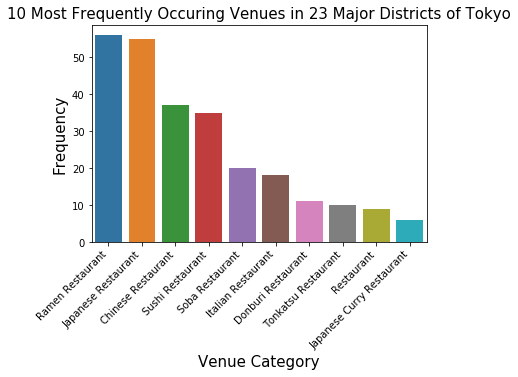

<Figure size 1296x504 with 0 Axes>

In [62]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Tokyo_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 23 Major Districts of Tokyo', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

#### Let's check the size of the resulting dataframe

In [64]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Tokyo_Venues_only_restaurant.shape)
Tokyo_Venues_only_restaurant.head(10)

Shape of the Data-Frame with Venue Category only Restaurant:  (340, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Chiyoda,35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
2,Chiyoda,35.69381,139.753216,Kanda Tendonya (神田天丼家),35.695765,139.754682,Tempura Restaurant
3,Chiyoda,35.69381,139.753216,Bondy (欧風カレー ボンディ),35.695544,139.757356,Japanese Curry Restaurant
4,Chiyoda,35.69381,139.753216,Sushi Masa (九段下 寿司政),35.695234,139.752227,Sushi Restaurant
5,Chiyoda,35.69381,139.753216,たいよう軒,35.696454,139.754809,Chinese Restaurant
6,Chiyoda,35.69381,139.753216,Fukumen Tomo (覆麺 智),35.696403,139.757070,Ramen Restaurant
7,Chiyoda,35.69381,139.753216,Yojinbo (用心棒),35.696409,139.756696,Ramen Restaurant
8,Chiyoda,35.69381,139.753216,咸亨酒店,35.696010,139.756730,Chinese Restaurant
9,Chiyoda,35.69381,139.753216,立川マシマシ 5号店,35.696380,139.756457,Ramen Restaurant
10,Chiyoda,35.69381,139.753216,三希房,35.697159,139.750652,Chinese Restaurant


In [127]:
Tokyo_Venues_restaurant = Tokyo_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())

#### Analyze Each Neighborhood

In [126]:
Tokyo_Venues_restaurant 

Neighborhood
Adachi         4
Arakawa        8
Bunkyō         3
Chiyoda       37
Chūō          65
Edogawa        2
Itabashi       2
Katsushika    10
Kita          12
Kōtō           1
Meguro         7
Minato        11
Nakano        10
Nerima         2
Setagaya       7
Shibuya       21
Shinagawa      7
Shinjuku      30
Suginami      11
Sumida         4
Taitō         22
Toshima       22
Ōta           42
Name: Venue Category, dtype: int64

In [143]:
Tokyo_Venues_restaurant_df  = Tokyo_Venues_restaurant.to_frame().reset_index()
Tokyo_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Tokyo_Venues_restaurant_df.index = np.arange(1, len(Tokyo_Venues_restaurant_df)+1)
list_rest_no =Tokyo_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =Tokyo_Venues_restaurant_df['Neighborhood'].to_list()
#print (list_rest_no)
#print (list_dist)

In [68]:
# one hot encoding
Tokyo_onehot = pd.get_dummies(Tokyo_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Tokyo_onehot['Neighborhood'] = Tokyo_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Tokyo_onehot.columns[-1]] + Tokyo_5_Dist_Venues_restaurant_df = Tokyo_5_Dist_Venues_restaurant.to_frame().reset_index()
Tokyo_5_Dist_Venues_restaurant_df.columns = ['District', 'Number of Restaurant'](Tokyo_onehot.columns[:-1])
Tokyo_onehot = Tokyo_onehot[fixed_columns]

Tokyo_onehot.head()

,Neighborhood,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Donburi Restaurant,Dongbei Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kaiseki Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monjayaki Restaurant,Nabe Restaurant,Okonomiyaki Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South Indian Restaurant,Spanish Restaurant,Sukiyaki Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
1,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chiyoda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Chiyoda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
# And let's examine the new dataframe size.
Tokyo_onehot.shape

(340, 47)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [73]:
Tokyo_grouped = Tokyo_onehot.groupby('Neighborhood').mean().reset_index()
Tokyo_grouped

,Neighborhood,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Donburi Restaurant,Dongbei Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,German Restaurant,Halal Restaurant,Hotpot Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kaiseki Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Kushikatsu Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monjayaki Restaurant,Nabe Restaurant,Okonomiyaki Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Soba Restaurant,South Indian Restaurant,Spanish Restaurant,Sukiyaki Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
0,Adachi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Arakawa,0.000000,0.000000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bunkyō,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Chiyoda,0.000000,0.000000,0.216216,0.000000,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000,0.054054,0.054054,0.081081,0.081081,0.000000,0.000000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.189189,0.054054,0.000000,0.000000,0.000000,0.000000,0.054054,0.000000,0.000000,0.000000,0.027027,0.000000,0.000000,0.027027,0.054054,0.027027,0.000000,0.000000,0.000000,0.000000,0.027027
4,Chūō,0.000000,0.000000,0.015385,0.046154,0.000000,0.000000,0.000000,0.015385,0.015385,0.000000,0.000000,0.015385,0.046154,0.015385,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.030769,0.000000,0.000000,0.030769,0.000000,0.000000,0.061538,0.000000,0.015385,0.000000,0.353846,0.000000,0.000000,0.030769,0.000000,0.015385,0.000000,0.030769,0.000000,0.015385,0.015385
5,Edogawa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Itabashi,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Katsushika,0.000000,0.000000,0.200000,0.200000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.10000

#### Let's confirm the new size

In [74]:
Tokyo_grouped.shape

(23, 47)

#### Let's print each neighborhood along with the top 5 most common venues

In [75]:
num_top_venues = 5

for hood in Tokyo_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Tokyo_grouped[Tokyo_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adachi----
                 venue  freq
0           Restaurant   0.5
1  Japanese Restaurant   0.5
2     Asian Restaurant   0.0
3  Sukiyaki Restaurant   0.0
4   Russian Restaurant   0.0


----Arakawa----
                venue  freq
0    Ramen Restaurant  0.38
1   Indian Restaurant  0.25
2  Italian Restaurant  0.12
3  Chinese Restaurant  0.12
4  Donburi Restaurant  0.12


----Bunkyō----
                 venue  freq
0   Italian Restaurant  0.33
1   Chinese Restaurant  0.33
2  Szechuan Restaurant  0.33
3     Sushi Restaurant  0.00
4           Restaurant  0.00


----Chiyoda----
                       venue  freq
0         Chinese Restaurant  0.22
1           Ramen Restaurant  0.19
2  Japanese Curry Restaurant  0.08
3        Japanese Restaurant  0.08
4            Thai Restaurant  0.05


----Chūō----
                 venue  freq
0     Sushi Restaurant  0.35
1  Japanese Restaurant  0.23
2      Soba Restaurant  0.06
3   Italian Restaurant  0.05
4   Donburi Restaurant  0.05


----Edogawa----

#### Let's put that into a *pandas* dataframe

In [76]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Now let's create the new dataframe and display the top 10 venues for each neighborhood

In [79]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Tokyo_grouped['Neighborhood']

for ind in np.arange(Tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(23)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adachi,Restaurant,Japanese Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant
1,Arakawa,Ramen Restaurant,Indian Restaurant,Italian Restaurant,Chinese Restaurant,Donburi Restaurant,Yoshoku Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant
2,Bunkyō,Chinese Restaurant,Szechuan Restaurant,Italian Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant
3,Chiyoda,Chinese Restaurant,Ramen Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Thai Restaurant,Restaurant,Italian Restaurant,Indian Restaurant,Soba Restaurant,Yoshoku Restaurant
4,Chūō,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Donburi Restaurant,Italian Restaurant,Unagi Restaurant,Tempura Restaurant,Ramen Restaurant,Seafood Restaurant,Yoshoku Restaurant
5,Edogawa,Ramen Restaurant,Italian Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant
6,Itabashi,Chinese Restaurant,Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant
7,Katsushika,Chinese Restaurant,Donburi Restaurant,Japanese Restaurant,Soba Restaurant,Dumpling Restaurant,Ramen Restaurant,Korean Restaurant,Yoshoku Restaurant,Kushikatsu Restaurant,Kosher Restaurant
8,Kita,Ramen Restaurant,Japanese Restaurant,Soba Restaurant,Chinese Restaurant,Donburi Restaurant,Dumpling Restaurant,Italian Restaurant,Yoshoku Restaurant,Kushikatsu Restaurant,Kosher Restaurant
9,Kōtō,Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant


## Cluster Neighborhoods

### Run *k*-means to cluster the neighborhood into 5 clusters.

In [98]:
# set number of clusters
kclusters = 5

Tokyo_grouped_clustering = Tokyo_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 4, 0, 0, 1, 2, 0, 0, 2], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [107]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tokyo_merged = df

tokyo_merged.rename(columns={'Name':'Neighborhood'}, inplace=True)

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
tokyo_merged = tokyo_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

tokyo_merged.head() # check the last columns!

,No.,Neighborhood,Kanji,Population,Density,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,01,Chiyoda,千代田区,59441,5100,11.66,35.693810,139.753216,0,Chinese Restaurant,Ramen Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Thai Restaurant,Restaurant,Italian Restaurant,Indian Restaurant,Soba Restaurant,Yoshoku Restaurant
1,02,Chūō,中央区,147620,14460,10.21,35.666255,139.775565,0,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Donburi Restaurant,Italian Restaurant,Unagi Restaurant,Tempura Restaurant,Ramen Restaurant,Seafood Restaurant,Yoshoku Restaurant
2,03,Minato,港区,248071,12180,20.37,35.643227,139.740055,0,Chinese Restaurant,Soba Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,French Restaurant,Japanese Restaurant,Indian Restaurant,Yoshoku Restaurant
3,04,Shinjuku,新宿区,339211,18620,18.22,35.693763,139.703632,0,Japanese Restaurant,Ramen Restaurant,Yakitori Restaurant,Tonkatsu Restaurant,Thai Restaurant,Yoshoku Restaurant,Shabu-Shabu Restaurant,Kushikatsu Restaurant,Japanese Curry Restaurant,Hotpot Restaurant
4,05,Bunkyō,文京区,223389,19790,11.29,35.718810,139.744732,4,Chinese Restaurant,Szechuan Restaurant,Italian Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant


Finally, let's visualize the resulting clusters

In [142]:
# create map
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
#Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(tokyo_merged['Latitude'], 
                                  tokyo_merged['Longitude'], 
                                  tokyo_merged['Neighborhood'], 
                                  tokyo_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

## Examine the Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

## Cluster 1

In [111]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 0, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Neighborhood,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chiyoda,11.66,35.693810,139.753216,0,Chinese Restaurant,Ramen Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Thai Restaurant,Restaurant,Italian Restaurant,Indian Restaurant,Soba Restaurant,Yoshoku Restaurant
1,Chūō,10.21,35.666255,139.775565,0,Sushi Restaurant,Japanese Restaurant,Soba Restaurant,Donburi Restaurant,Italian Restaurant,Unagi Restaurant,Tempura Restaurant,Ramen Restaurant,Seafood Restaurant,Yoshoku Restaurant
2,Minato,20.37,35.643227,139.740055,0,Chinese Restaurant,Soba Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,French Restaurant,Japanese Restaurant,Indian Restaurant,Yoshoku Restaurant
3,Shinjuku,18.22,35.693763,139.703632,0,Japanese Restaurant,Ramen Restaurant,Yakitori Restaurant,Tonkatsu Restaurant,Thai Restaurant,Yoshoku Restaurant,Shabu-Shabu Restaurant,Kushikatsu Restaurant,Japanese Curry Restaurant,Hotpot Restaurant
5,Taitō,10.11,35.717450,139.790859,0,Ramen Restaurant,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Soba Restaurant,Sukiyaki Restaurant,Monjayaki Restaurant,Nabe Restaurant,Restaurant,Halal Restaurant
6,Sumida,13.77,35.700429,139.805017,0,Unagi Restaurant,Ramen Restaurant,Japanese Restaurant,Sushi Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant
8,Shinagawa,22.84,35.599252,139.738910,0,Soba Restaurant,Donburi Restaurant,Restaurant,Japanese Restaurant,Sushi Restaurant,Italian Restaurant,Yoshoku Restaurant,Indian Restaurant,Kosher Restaurant,Korean Restaurant
9,Meguro,14.67,35.621250,139.688014,0,Chinese Restaurant,Japanese Restaurant,Sushi Restaurant,Italian Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant
10,Ōta,60.66,35.561206,139.715843,0,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Tonkatsu Restaurant,Sushi Restaurant,Yoshoku Restaurant,Vietnamese Restaurant,Taiwanese Restaurant,Dumpling Restaurant,Soba Restaurant
11,Setagaya,58.05,35.646530,139.653250,0,Ramen Restaurant,Chinese Restaurant,Fast Food Restaurant,Japanese Restaurant,Shanghai Restaurant,Soba Restaurant,Yoshoku Restaurant,Italian Restaurant,Kosher Restaurant,Korean Restaurant


## Cluster 2

In [112]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 1, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Neighborhood,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Arakawa,10.16,35.737529,139.781310,1,Ramen Restaurant,Indian Restaurant,Italian Restaurant,Chinese Restaurant,Donburi Restaurant,Yoshoku Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant
22,Edogawa,49.90,35.678278,139.871091,1,Ramen Restaurant,Italian Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant


## Cluster 3

In [113]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 2, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Neighborhood,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Kōtō,40.16,35.649154,139.812790,2,Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant
18,Itabashi,32.22,35.774143,139.681209,2,Chinese Restaurant,Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant
20,Adachi,53.25,35.783703,139.795319,2,Restaurant,Japanese Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant


## Cluster 4

In [114]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 3, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Neighborhood,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Nerima,48.08,35.74836,139.638735,3,Chinese Restaurant,Yoshoku Restaurant,Indian Restaurant,Mexican Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant


## Cluster 5

In [115]:
tokyo_merged.loc[tokyo_merged['Cluster Labels'] == 4, tokyo_merged.columns[[1] + list(range(5, tokyo_merged.shape[1]))]]

,Neighborhood,Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bunkyō,11.29,35.71881,139.744732,4,Chinese Restaurant,Szechuan Restaurant,Italian Restaurant,Yoshoku Restaurant,Indian Restaurant,Kushikatsu Restaurant,Kosher Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant
